In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

# Get Data

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x.T
data = []
for i in range(0,len(x.T)):
    data.append(x.T[i])
data.append(y)
data = np.array(data).T

"""
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
0 Iris Setosa
1 Iris Versicolour
2 Iris Virginica

"""
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

# Data Analysis

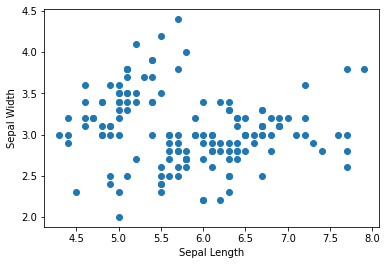

In [3]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width");

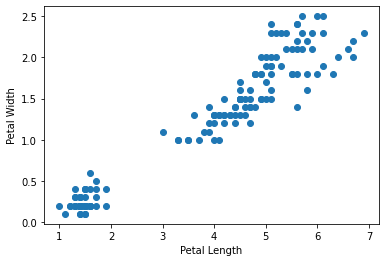

In [4]:
plt.scatter(data[:,2],data[:,3])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width");

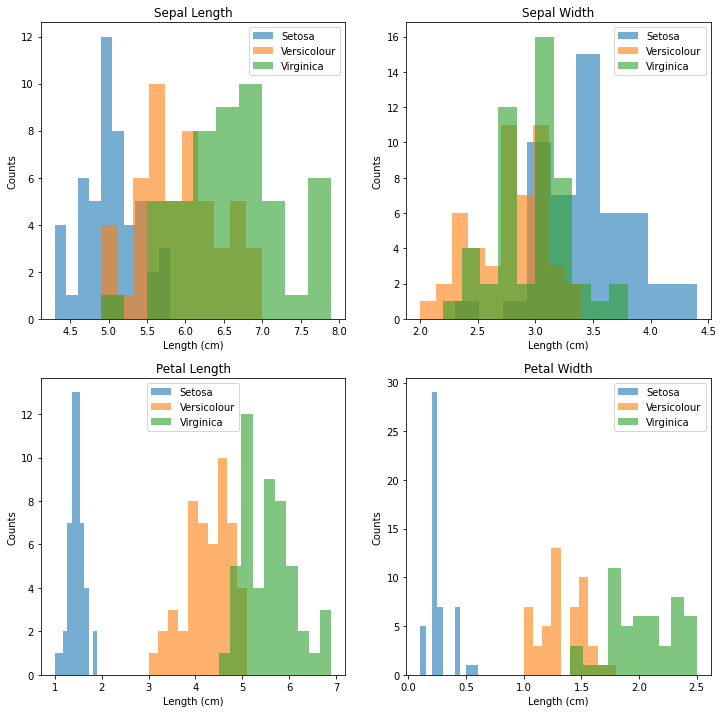

In [25]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.hist(data[:,0][data[:,4]==0], alpha = .6, label = "Setosa")
plt.hist(data[:,0][data[:,4]==1], alpha = .6, label = "Versicolour")
plt.hist(data[:,0][data[:,4]==2], alpha = .6, label = "Virginica")
plt.title("Sepal Length")
plt.ylabel("Counts")
plt.xlabel("Length (cm)")
plt.legend()

plt.subplot(2,2,2)
plt.hist(data[:,1][data[:,4]==0], alpha = .6, label = "Setosa")
plt.hist(data[:,1][data[:,4]==1], alpha = .6, label = "Versicolour")
plt.hist(data[:,1][data[:,4]==2], alpha = .6, label = "Virginica")
plt.title("Sepal Width")
plt.ylabel("Counts")
plt.xlabel("Length (cm)")
plt.legend()

plt.subplot(2,2,3)
plt.hist(data[:,2][data[:,4]==0], alpha = .6, label = "Setosa")
plt.hist(data[:,2][data[:,4]==1], alpha = .6, label = "Versicolour")
plt.hist(data[:,2][data[:,4]==2], alpha = .6, label = "Virginica")
plt.title("Petal Length")
plt.ylabel("Counts")
plt.xlabel("Length (cm)")
plt.legend()

plt.subplot(2,2,4)
plt.hist(data[:,3][data[:,4]==0], alpha = .6, label = "Setosa")
plt.hist(data[:,3][data[:,4]==1], alpha = .6, label = "Versicolour")
plt.hist(data[:,3][data[:,4]==2], alpha = .6, label = "Virginica")
plt.title("Petal Width")
plt.ylabel("Counts")
plt.xlabel("Length (cm)")
plt.legend()


# Preproccessing 

In [5]:
np.random.shuffle(data)
train = data[:int(len(data)*.8)]
test = data[int(len(data)*.8):]

trainX = train[:,0:4]
trainY = train[:,-1]

testX = test[:,0:4]
testY = test[:,-1]

scaler = StandardScaler()
scaler.fit(trainX)
scaler.transform(trainX)

scaler2 = StandardScaler()
scaler2.fit(testX)
scaler2.transform(testX);



# Models

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
clf = SVC()
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))

RMSE: 0.18257418583505536


In [7]:
clf = SVC(kernel = 'rbf')
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))

RMSE: 0.18257418583505536


In [8]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','sigmoid', 'rbf'), 'C':[1, 5, 10], 'gamma':['scale','auto']}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(trainX,trainY)
df = pd.DataFrame(clf.cv_results_)
print("best parameters")
df[df['rank_test_score'] == 1]['params']

best parameters


0    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
3     {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
5        {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
8       {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Name: params, dtype: object

In [9]:
clf = SVC(C = 1, gamma = 'scale', kernel = 'linear')
clf.fit(trainX,trainY)
predY = clf.predict(testX)
rmse = np.sqrt(mean_squared_error(testY, predY))
print("RMSE: " + str(rmse))
print("Accuracy = " + str(clf.score(testX,testY)))

RMSE: 0.18257418583505536


0.9666666666666667

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX,trainY)
neigh.score(testX,testY)
print("Accuracy = " + str(neigh.score(testX,testY)))

0.9666666666666667

In [11]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
svc = KNeighborsClassifier()
clf = GridSearchCV(svc, parameters, cv = 5)
clf.fit(trainX,trainY)
df = pd.DataFrame(clf.cv_results_)
print("best parameters")
df[df['rank_test_score'] == 1]['params']

best parameters


7    {'n_neighbors': 8}
Name: params, dtype: object

In [12]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(trainX,trainY)
neigh.score(testX,testY)

0.9666666666666667